In [ ]:
Name: Sahara Khan  ; Student Number: 2331442

In [1]:
!pip install Pillow matplotlib numpy

In [ ]:
Exercise - 1

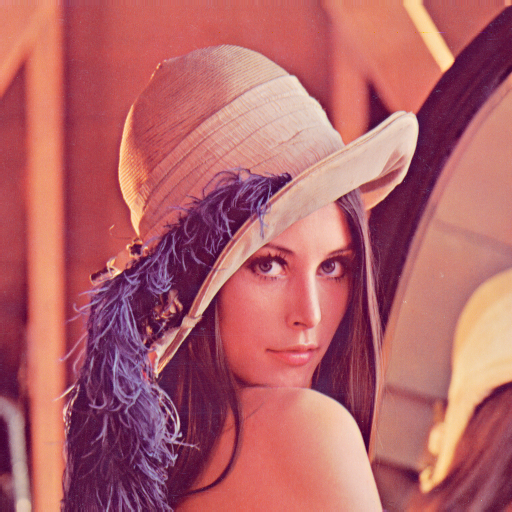

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('Lenna_(test_image).png') 


display(image)


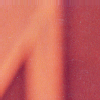

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Open the image and convert it to a NumPy array
image = Image.open("Lenna_(test_image).png")  
image_array = np.array(image)  # Convert to NumPy array

# Extract the top-left 100x100 pixels
cropped_array = image_array[:100, :100]  # Select first 100 rows and first 100 columns

# Display the cropped image
display(cropped_image)

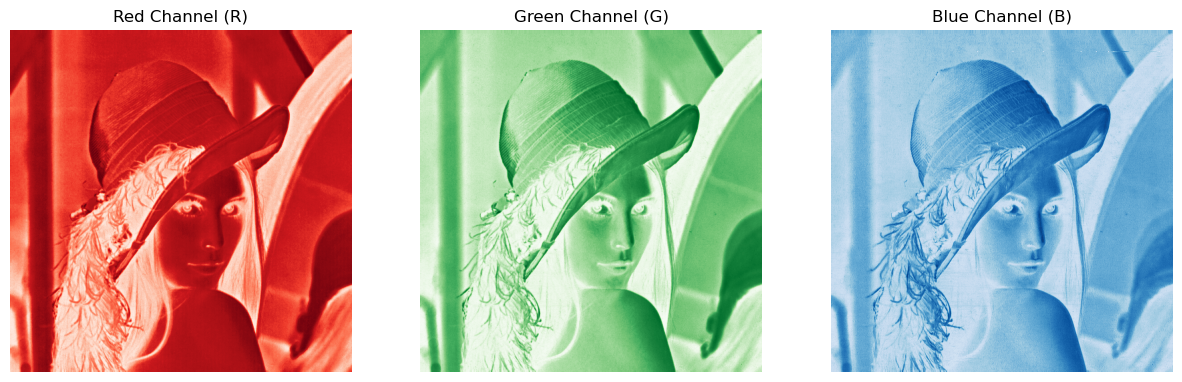

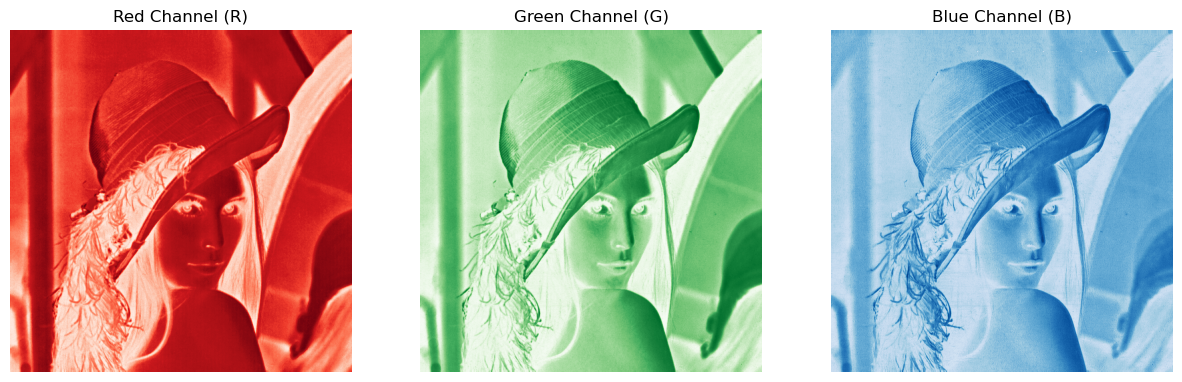

In [20]:
from PIL import Image
import numpy as np
from IPython.display import display  # For inline display in Jupyter Notebook
import matplotlib.pyplot as plt

# Open the image using Pillow
image = Image.open('Lenna_(test_image).png')

# Convert the image to a NumPy array
image_array = np.array(image)

# Separate the image into its three color channels (R, G, B)
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Red channel
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("Red Channel (R)")
axes[0].axis('off')

# Green channel
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("Green Channel (G)")
axes[1].axis('off')

# Blue channel
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("Blue Channel (B)")
axes[2].axis('off')

# Display the figure inline using display()
display(fig) 

In [ ]:
Exercise -2 

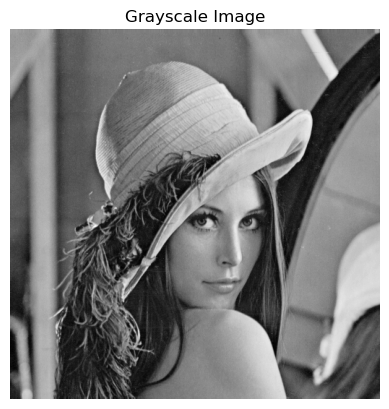

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the grayscale image using Pillow
image_gray = Image.open('lena_gray.gif').convert('L')  # Convert to grayscale ('L' mode)

# Display the grayscale image using matplotlib
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


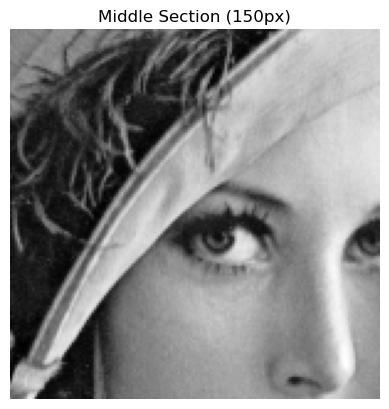

In [23]:
import numpy as np

# Convert the grayscale image to a NumPy array
image_array = np.array(image_gray)

# Get the dimensions of the image
height, width = image_array.shape

# Calculate the coordinates for the 150-pixel section from the center
start_y = (height - 150) // 2
end_y = start_y + 150
start_x = (width - 150) // 2
end_x = start_x + 150

# Extract the middle 150x150 section
cropped_image = image_array[start_y:end_y, start_x:end_x]

# Display the cropped image using matplotlib
plt.imshow(cropped_image, cmap='gray')
plt.title("Middle Section (150px)")
plt.axis('off')
plt.show()


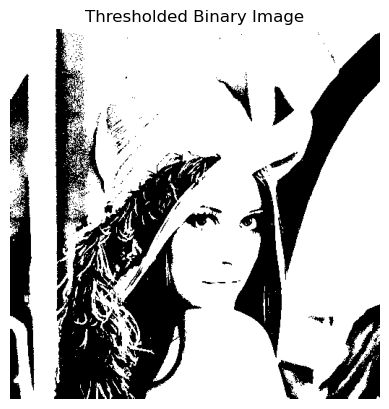

In [24]:
# Apply a threshold to the grayscale image
threshold_image = np.where(image_array < 100, 0, 255)

# Display the resulting binary image using matplotlib
plt.imshow(threshold_image, cmap='gray')
plt.title("Thresholded Binary Image")
plt.axis('off')
plt.show()


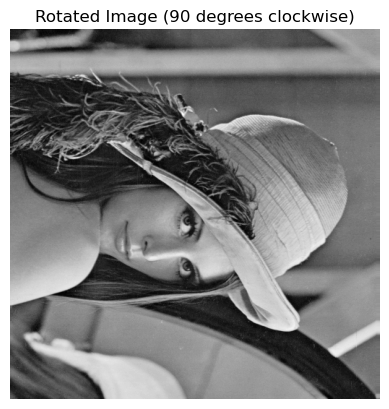

In [25]:
# Rotate the grayscale image 90 degrees clockwise
rotated_image = image_gray.rotate(-90, expand=True)

# Display the rotated image using matplotlib
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (90 degrees clockwise)")
plt.axis('off')
plt.show()


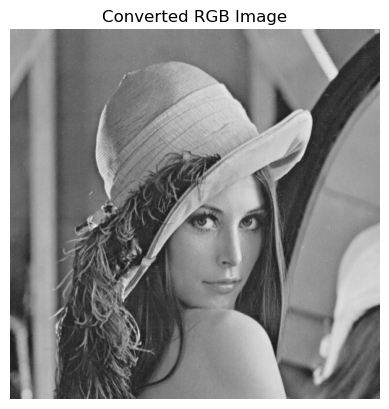

In [26]:
# Convert the grayscale image to RGB b
rgb_image = np.stack([image_array] * 3, axis=-1)  # Stack the grayscale array three times along the last axis

# Convert the resulting NumPy array back to a PIL image
rgb_image_pil = Image.fromarray(rgb_image.astype(np.uint8))

# Display the RGB image using matplotlib
plt.imshow(rgb_image_pil)
plt.title("Converted RGB Image")
plt.axis('off')
plt.show()


In [ ]:
Exercise - 3

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load image and convert to grayscale
image = Image.open("team-member1.jpg").convert("L")

# Step 2: Convert the image to a NumPy array
image_array = np.array(image)

# Step 3: Get image dimensions
height, width = image_array.shape

# Step 4: Reshape the image into a 2D array where each row represents a row of pixels
# PCA requires each row to be treated as a data point (observation), where each pixel is a feature.
data = image_array.reshape(height, width)

# Step 5: Standardize the data
# Compute the mean of each column (pixel across the image)
mean = np.mean(data, axis=0)

# Subtract the mean to center the data (so that PCA focuses on variance, not absolute values)
centered_data = data - mean

# Step 6: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)





Covariance Matrix:
[[1222.78270761 1208.60842043 1186.56175314 ... -256.01939269
  -251.46660447 -248.23088952]
 [1208.60842043 1207.40680188 1197.55750375 ... -246.80867442
  -241.79089862 -238.19802155]
 [1186.56175314 1197.55750375 1203.77826233 ... -235.0276667
  -229.51434382 -225.67968931]
 ...
 [-256.01939269 -246.80867442 -235.0276667  ... 5843.38138853
  5852.72637983 5850.29456732]
 [-251.46660447 -241.79089862 -229.51434382 ... 5852.72637983
  5866.43832953 5866.94329706]
 [-248.23088952 -238.19802155 -225.67968931 ... 5850.29456732
  5866.94329706 5870.56151045]]


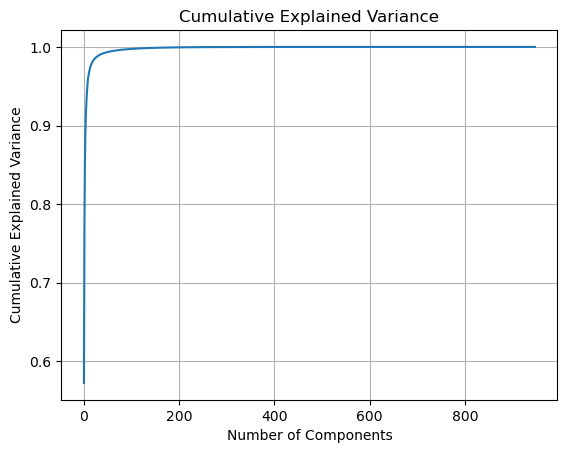

Explained Variance for Top k Components: 0.9974427574788723


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert it to grayscale
image = Image.open("team-member1.jpg").convert("L")

# Convert the image to a NumPy array
image_array = np.array(image)

# Get image dimensions
height, width = image_array.shape

# Reshape the image into a 2D array where each row represents a row of pixels
data = image_array.reshape(height, width)

# Standardize the data by centering (subtracting the mean)
mean = np.mean(data, axis=0)
centered_data = data - mean

# Step 1: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Step 2: Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 3: Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 4: Plot the cumulative explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Choose the number of principal components k based on the cumulative variance plot
k = 100  

# Display the top k eigenvectors (Principal Components)
top_k_eigenvectors = eigenvectors[:, :k]

# If you want to display the explained variance for the top k components
print("Explained Variance for Top k Components:", np.sum(explained_variance_ratio[:k]))



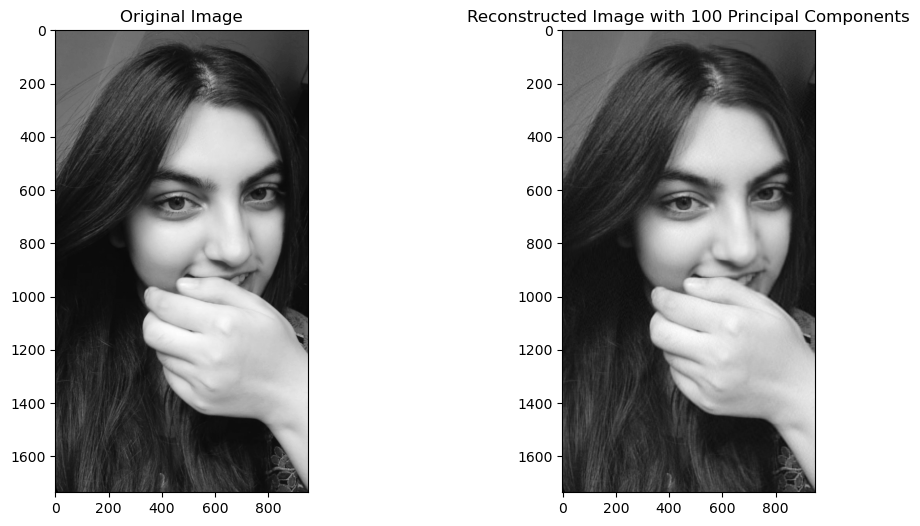

In [35]:
# Project the original (centered) data onto the top k eigenvectors (principal components)
projected_data = np.dot(centered_data, top_k_eigenvectors)

# Reconstruct the image by projecting back from the reduced space to the original space
reconstructed_data = np.dot(projected_data, top_k_eigenvectors.T) + mean

# Reshape the reconstructed data back into the original shape of the image
reconstructed_image = reconstructed_data.reshape(height, width)

# Display the original and reconstructed image for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_array, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(reconstructed_image, cmap='gray')
ax[1].set_title(f"Reconstructed Image with {k} Principal Components")
plt.show()


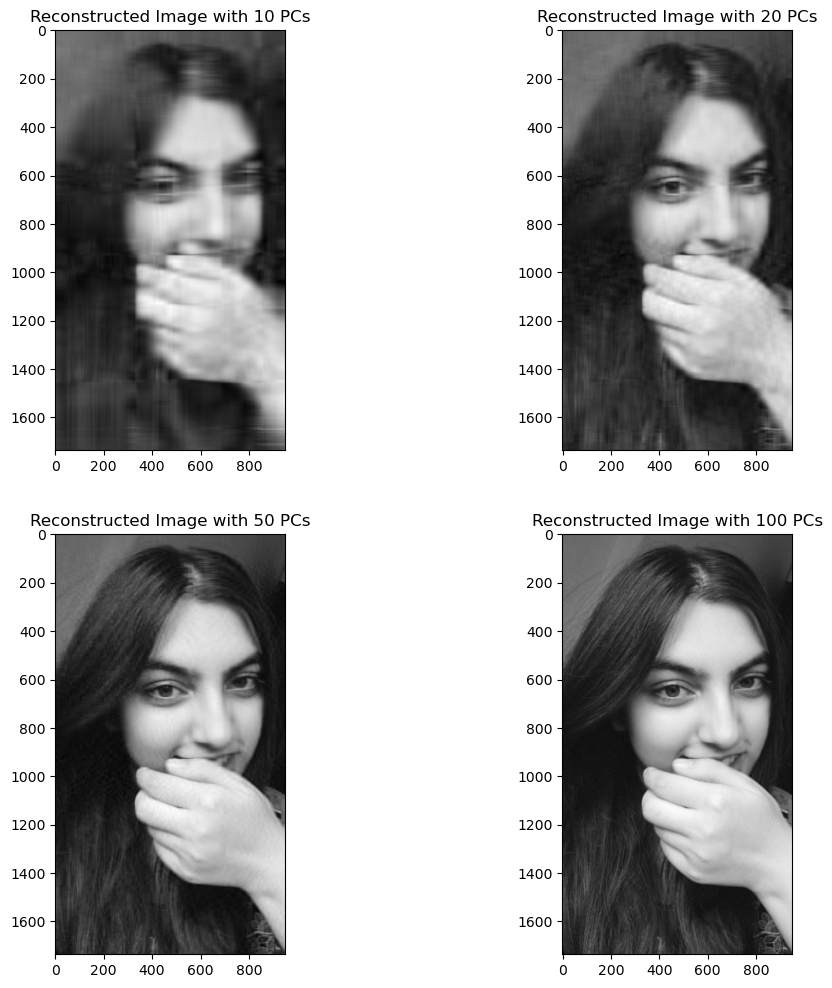

In [38]:
# Experiment with different values of k and compare the results

k_values = [10, 20 , 50, 100]  # Experimenting with 4 different values of k

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, k in enumerate(k_values):
    top_k_eigenvectors = eigenvectors[:, :k]  # Select top k eigenvectors
    projected_data = np.dot(centered_data, top_k_eigenvectors)  # Project the data
    reconstructed_data = np.dot(projected_data, top_k_eigenvectors.T) + mean  # Reconstruct
    reconstructed_image = reconstructed_data.reshape(height, width)  # Reshape to image
    
    ax[i//2, i%2].imshow(reconstructed_image, cmap='gray')
    ax[i//2, i%2].set_title(f"Reconstructed Image with {k} PCs")

plt.show()
